**Exponential scheduling**

Exponential scheduling is a method to adjust parameters, such as learning rates, over time. It's often used in optimization algorithms and machine learning to ensure smooth parameter changes.

Exponential Decay:

learning_rate = initial_learning_rate * decay_rate ** (step / decay_steps)

- learning_rate: Current learning rate
- initial_learning_rate: Starting learning rate
- decay_rate: Rate at which the learning rate decays
- step: Current time step or iteration
- decay_steps: Number of steps after which the learning rate is decayed


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Split the data into training and validation sets
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Normalize the pixel values to the range [0, 1]
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Define class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
# Compute the mean and standard deviation of the training set for normalization
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)

# Normalize the datasets using the computed mean and std deviation
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [5]:
# Define the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))

# Add the output layer with 10 neurons and softmax activation
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# Define the optimizer with legacy SGD and learning rate decay
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=1e-4)

In [6]:
# # Define a learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=20_000,
    decay_rate=0.1,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [7]:
# Function to build and train the model
def build_and_train_model(optimizer):
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    history = model.fit(X_train_scaled, y_train, epochs=10,
                        validation_data=(X_valid_scaled, y_valid))
    return history

# Train the model with power scheduling
history_power_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 39s 19ms/step - loss: 2.0861 - accuracy: 0.1681 - val_loss: 2.3026 - val_accuracy: 0.1030
Epoch 2/10
1719/1719 [==============================] - 30s 17ms/step - loss: 2.3030 - accuracy: 0.0992 - val_loss: 2.3029 - val_accuracy: 0.1006
Epoch 3/10
1719/1719 [==============================] - 30s 18ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3029 - val_accuracy: 0.0994
Epoch 4/10
1719/1719 [==============================] - 31s 18ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.0994
Epoch 5/10
1719/1719 [==============================] - 29s 17ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3028 - val_accuracy: 0.0900
Epoch 6/10
1719/1719 [==============================] - 31s 18ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3029 - val_accuracy: 0.0900
Epoch 7/10
1719/1719 [==============================] - 33s 19ms/step - loss: 2.0982 - accuracy: 0.1870 - val_loss: 1.8603 -

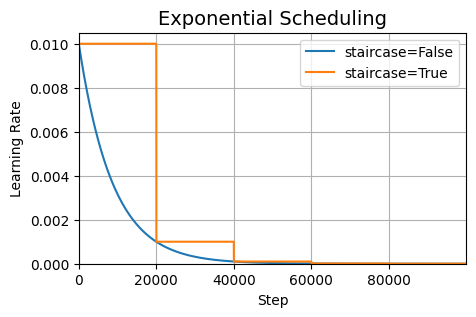

In [9]:
initial_learning_rate = 0.01

# Decay rate and steps for the learning rate schedule
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)

# Calculate the learning rate for each step without staircase (continuous decay)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
# Calculate the learning rate for each step with staircase (discrete decay)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.figure(figsize=(5, 3))
plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()